## K-means 알고리즘을 통한 붓꽃 품종 구분하기

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
import pandas as pd

from sklearn.cluster import KMeans
iris_df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width'
                                                , 'petal_length', 'petal_width'])
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [4]:

KM = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
KM.fit(iris_df)

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [5]:

KM.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [6]:
iris_df['target'] = iris.target
iris_df['cluster'] = KM.labels_
iris_df.groupby(['target', 'cluster'])['sepal_length'].count()

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64

### silhouette 계수 측정

In [8]:
from sklearn.metrics import silhouette_score, silhouette_samples
scores_samples=silhouette_samples(iris.data, iris_df['cluster'])
iris_df['silhouette_coeff']=scores_samples
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,1,0.852582
1,4.9,3.0,1.4,0.2,0,1,0.814916
2,4.7,3.2,1.3,0.2,0,1,0.828797
3,4.6,3.1,1.5,0.2,0,1,0.804352
4,5.0,3.6,1.4,0.2,0,1,0.848918


In [9]:
silhouette_score(iris.data, iris_df['cluster'])

np.float64(0.5511916046195919)

### 실루엣 차트

In [10]:
import matplotlib.pyplot as plt

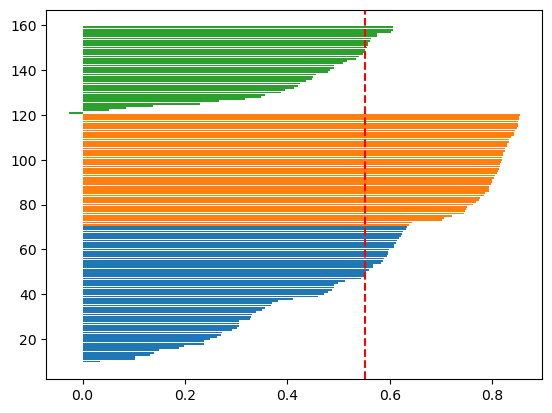

In [12]:
y_lower=10
for i in range(3):
    cluster_i=scores_samples[iris_df['cluster']==i]
    cluster_i.sort()
    y_upper=y_lower+len(cluster_i)
    plt.barh(range(y_lower,y_upper), cluster_i, label=f'Cluster(i)')
    y_lower=y_upper
# 평균과 비교
avg_score=silhouette_score(iris.data, iris_df['cluster'])
plt.axvline(avg_score,color='red', linestyle='--', label='Avg Score')

### scree plot

In [13]:
KM.inertia_

78.85566582597728

In [56]:
scree_df=iris_df[['sepal_length','sepal_width','petal_length','petal_width']]

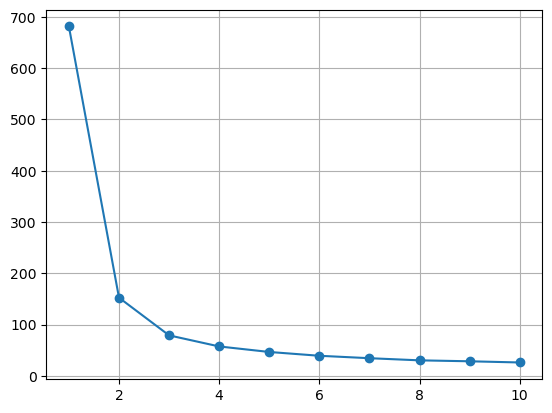

In [57]:
inertia=[]
k_values=range(1,11)
for k in k_values:
    kmeans=KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scree_df)
    inertia.append(kmeans.inertia_)
    
plt.plot(k_values, inertia, marker='o')
plt.grid()
plt.show()

## PCA 2개의 주성분으로 축소

In [59]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(iris.data)
pca_transformed.shape

(150, 2)

In [60]:
iris_df['pca_x']=pca_transformed[:,0]
iris_df['pca_y']=pca_transformed[:,1]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette_coeff,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,0.852582,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,0.814916,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,0.828797,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,0.804352,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,0.848918,-2.728717,0.326755


## PCA 결과 시각화

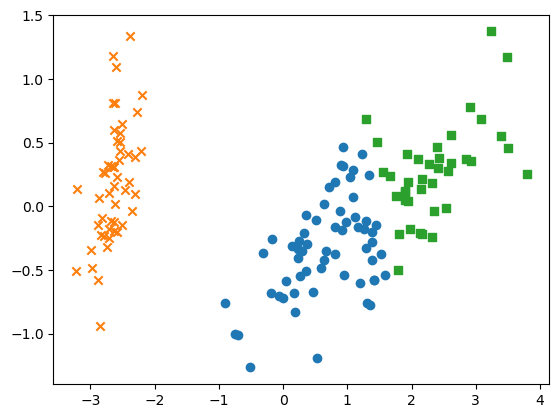

In [61]:
plt.scatter(x=iris_df.loc[iris_df['cluster']==0, 'pca_x'],
            y=iris_df.loc[iris_df['cluster']==0, 'pca_y'], marker='o')

plt.scatter(x=iris_df.loc[iris_df['cluster']==1, 'pca_x'],
            y=iris_df.loc[iris_df['cluster']==1, 'pca_y'], marker='x')

plt.scatter(x=iris_df.loc[iris_df['cluster']==2, 'pca_x'],
            y=iris_df.loc[iris_df['cluster']==2, 'pca_y'], marker='s')

plt.show()

In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# feature 컬럼만 추출 (표준화 전 원본 데이터)
X_origin = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values

# KMeans 군집화
kmeans_origin = KMeans(n_clusters=3, random_state=42)
kmeans_origin.fit(X_origin)

# inertia
print("Inertia :", kmeans_origin.inertia_)

# silhouette score
sil_score_origin = silhouette_score(X_origin, kmeans_origin.labels_)
print("Silhouette Score :", sil_score_origin)

Inertia (원본): 78.85566582597728
Silhouette Score (원본): 0.5511916046195919


In [63]:
# 각 주성분(PC, Principal Component)이 데이터의 전체 분산(정보) 중에서 얼마만큼을 설명(보존)하는지
# 비율(%)로 나타내는 값.
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

### StandardScaler로 스케일링


In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [65]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X_scaled)

In [66]:
iris_df['pca_x'] = pca_transformed[:, 0]
iris_df['pca_y'] = pca_transformed[:, 1]

In [67]:
# cluster별 평균값 보기
iris_df.groupby('cluster')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,5.883607,2.740984,4.388525,1.434426
1,5.006000,3.428000,1.462000,0.246000
2,6.853846,3.076923,5.715385,2.053846


### PCA 2개로 축소하여 시각화

In [182]:
from sklearn.preprocessing import StandardScaler
iris_caled = StandardScaler().fit_transform(iris_df.iloc[:,:4])
iris_caled[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [183]:
from sklearn.decomposition import PCA
pca_scaled = PCA(n_components=2)
pca_transformed_scaled =  pca_scaled.fit_transform(iris_caled)
#주성분1, 주성분2
iris_df['pca_scaled_x'] = pca_transformed_scaled[:, 0]
iris_df['pca_scaled_y'] = pca_transformed_scaled[:, 1]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette_coeff,pca_x,pca_y,pca_scaled_x,pca_scaled_y
0,5.1,3.5,1.4,0.2,0,1,0.852582,-2.264703,0.480027,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,0,1,0.814916,-2.080961,-0.674134,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,0,1,0.828797,-2.364229,-0.341908,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,0,1,0.804352,-2.299384,-0.597395,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,0,1,0.848918,-2.389842,0.646835,-2.389842,0.646835


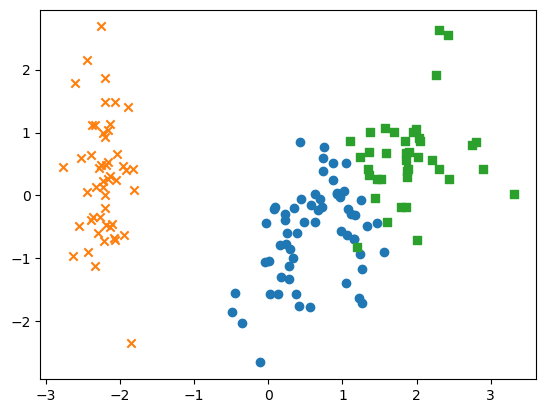

In [184]:
plt.scatter(x=iris_df.loc[iris_df['cluster']==0, 'pca_x'],
            y=iris_df.loc[iris_df['cluster']==0, 'pca_y'], marker='o')

plt.scatter(x=iris_df.loc[iris_df['cluster']==1, 'pca_x'],
            y=iris_df.loc[iris_df['cluster']==1, 'pca_y'], marker='x')

plt.scatter(x=iris_df.loc[iris_df['cluster']==2, 'pca_x'],
            y=iris_df.loc[iris_df['cluster']==2, 'pca_y'], marker='s')

## Inertia와 실루엣 점수 구하기

In [69]:
from sklearn.cluster import KMeans

# 예시: 3개 군집으로 KMeans 실행
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)   # 표준화 데이터 사용 추천

# inertia 값 확인
print("Inertia:", kmeans.inertia_)


# silhouette_score(데이터, 군집라벨)
sil_score = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", sil_score)

Inertia: 191.0247368531797
Silhouette Score: 0.4798814508199817


In [70]:
# 각 주성분(PC, Principal Component)이 데이터의 전체 분산(정보) 중에서 얼마만큼을 설명(보존)하는지
# 비율(%)로 나타내는 값.
pca.explained_variance_ratio_ 

array([0.72962445, 0.22850762])

### 클러스터링 실습

In [104]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target

In [122]:

cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,pca_x,pca_y,Cluster
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,1640.689535,-415.662171,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1794.810334,22.104418,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1408.265413,55.376005,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,-575.840659,-95.290162,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1315.701311,267.768254,0


In [106]:
import numpy as np
np.unique(cancer.target)

array([0, 1])

#### 군집화

In [172]:
from sklearn.cluster import KMeans

KM = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
# feature만 fit: 'target' 컬럼은 제외
KM.fit(cancer_df.drop(columns='target'))

KMeans(n_clusters=2, random_state=0)

#### 클러스터 컬럼 추가

In [173]:
cancer_df['cluster'] = KM.labels_

#### pca 2개의 주성분으로

In [174]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(cancer.data)
pca_transformed.shape   # 2차원으로 축소완료

(569, 2)

In [175]:

from sklearn.decomposition import PCA

# feature만 추출 (target 컬럼 제외)
X = cancer_df.drop(columns='target').values

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X)

# 결과를 DataFrame에 추가
cancer_df['pca_x'] = pca_transformed[:, 0]
cancer_df['pca_y'] = pca_transformed[:, 1]

In [176]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=2, random_state=42)
cancer_df['Cluster']=kmeans.fit_predict(cancer_df[['pca_x','pca_y']])

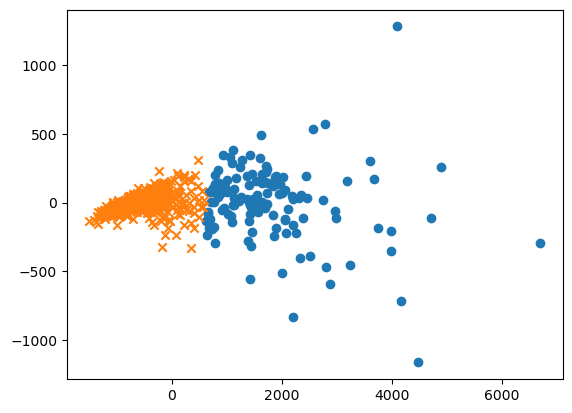

In [169]:
plt.scatter(x=cancer_df.loc[cancer_df['Cluster']==0, 'pca_x'],
            y=cancer_df.loc[cancer_df['Cluster']==0, 'pca_y'], marker='o')

plt.scatter(x=cancer_df.loc[cancer_df['Cluster']==1, 'pca_x'],
            y=cancer_df.loc[cancer_df['Cluster']==1, 'pca_y'], marker='x')

In [177]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# PCA 결과를 X_cluster로 할당
X_cluster = cancer_df[['pca_x', 'pca_y']].values  # 또는 ['pca1', 'pca2']

kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_cluster)

print("Inertia:", kmeans.inertia_)
print("Silhouette Score:", silhouette_score(X_cluster, cluster_labels))

Inertia: 309953094.35458976
Silhouette Score: 0.6984190874809738


In [120]:
pca.explained_variance_ratio_ 

array([0.98291884, 0.01619089])

### 2개 주성분 스케일링

In [179]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. feature와 target 분리
features = cancer_df.drop(columns='target').values
target = cancer_df['target'].values

In [180]:
# 표준화(스케일링)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(features)

# 3. PCA (2차원)
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X_scaled)


# 4. DataFrame에 결과 추가
cancer_df['pca_x'] = pca_transformed[:, 0]
cancer_df['pca_y'] = pca_transformed[:, 1]


# 5. KMeans (군집 수 2)
kmeans = KMeans(n_clusters=2, random_state=42)
cancer_df['cluster'] = kmeans.fit_predict(cancer_df[['pca_x', 'pca_y']])

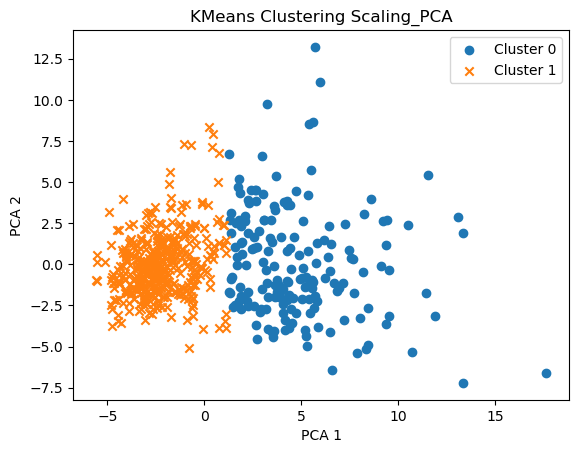

In [102]:
# 6. 시각화
plt.scatter(cancer_df.loc[cancer_df['cluster']==0, 'pca_x'],
            cancer_df.loc[cancer_df['cluster']==0, 'pca_y'], marker='o', label='Cluster 0')
plt.scatter(cancer_df.loc[cancer_df['cluster']==1, 'pca_x'],
            cancer_df.loc[cancer_df['cluster']==1, 'pca_y'], marker='x', label='Cluster 1')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.title('KMeans Clustering Scaling_PCA')
plt.show()

In [181]:
# 평가 지표 출력
print("Inertia:", kmeans.inertia_)
print("Silhouette Score:", silhouette_score(X_pca, cancer_df['cluster']))

Inertia: 6509.820115345734
Silhouette Score: 0.4749771603513363


In [103]:
pca.explained_variance_ratio_ 

array([0.4412248 , 0.18505225])

### 3개 주성분

In [150]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# feature만 사용
X = cancer_df.drop(columns=['target', 'cluster'] ).values

# 1. PCA 3개 주성분
pca = PCA(n_components=3)
pca_transformed = pca.fit_transform(X)

# 2. DataFrame에 추가
cancer_df['pca1'] = pca_transformed[:, 0]
cancer_df['pca2'] = pca_transformed[:, 1]
cancer_df['pca3'] = pca_transformed[:, 2]

# 3. KMeans (군집 2개 예시)
kmeans = KMeans(n_clusters=2, random_state=42)
cancer_df['cluster'] = kmeans.fit_predict(cancer_df[['pca1', 'pca2', 'pca3']])

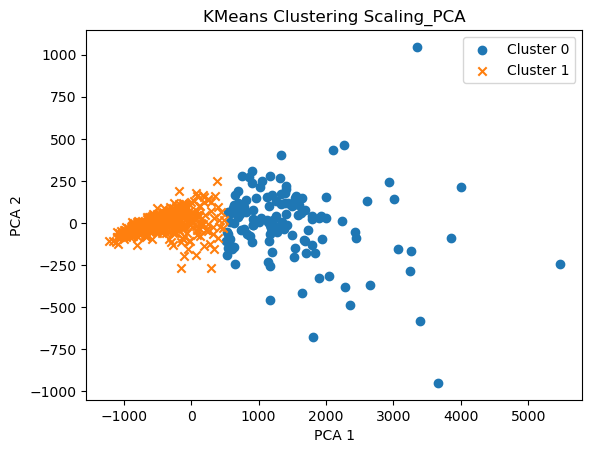

In [151]:
import matplotlib.pyplot as plt
plt.scatter(cancer_df.loc[cancer_df['cluster']==0, 'pca_x'],
            cancer_df.loc[cancer_df['cluster']==0, 'pca_y'], marker='o', label='Cluster 0')
plt.scatter(cancer_df.loc[cancer_df['cluster']==1, 'pca_x'],
            cancer_df.loc[cancer_df['cluster']==1, 'pca_y'], marker='x', label='Cluster 1')



plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.title('KMeans Clustering Scaling_PCA')
plt.show()

In [152]:
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f}")

PC1: 0.9832
PC2: 0.0162
PC3: 0.0005


### 3개 주성분 Kmeans

In [153]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd

#1.feature만 추출
X=cancer_df.drop(columns=['target','cluster']).values

#2. 표준화(스케일링)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

#3. PCA(3개 주성분)
pca=PCA(n_components=3)
X_pca=pca.fit_transform(X_scaled)

#4. DataFrame에 PCA 결과 추가
cancer_df['pca1']=X_pca[:, 0]
cancer_df['pca2']=X_pca[:, 1]
cancer_df['pca3']=X_pca[:, 2]

# 5. KMeans 군집화 (예시: n_clusters=2)
kmeans=KMeans(n_clusters=2, random_state=42)
cancer_df['cluster']=kmeans.fit_predict(X_pca)



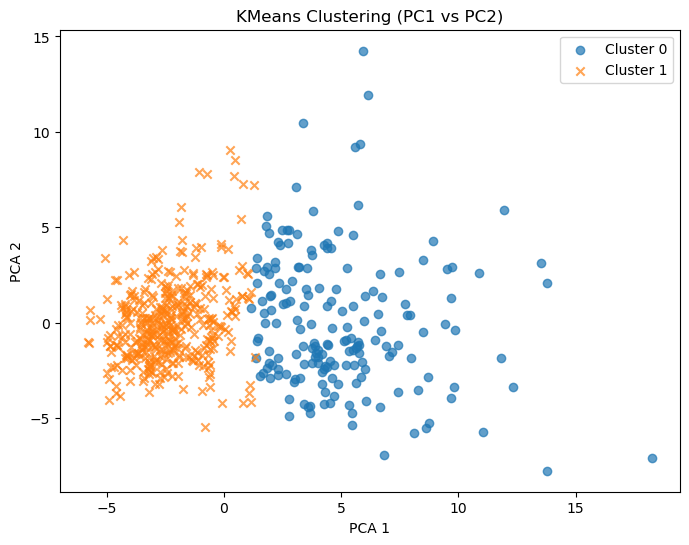

In [147]:
# 6.시각화 (PC1 vs PC2)
plt.figure(figsize=(8, 6))
for c, marker, color in zip([0, 1], ['o', 'x'], ['tab:blue', 'tab:orange']):
    plt.scatter(
        cancer_df.loc[cancer_df['cluster']==c, 'pca1'],
        cancer_df.loc[cancer_df['cluster']==c, 'pca2'],
        marker=marker, color=color, label=f'Cluster {c}', alpha=0.7
    )
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KMeans Clustering (PC1 vs PC2)')
plt.legend()
plt.show()

In [154]:
pca.explained_variance_ratio_

array([0.42624745, 0.17642603, 0.09767511])

### 4,5,6개 주성분

In [163]:
from sklearn.decomposition import PCA

for n in [4, 5, 6]:
    pca = PCA(n_components=n)
    X = cancer_df.drop(columns=['target', 'cluster'], errors='ignore').values  # feature만 사용
    pca_transformed = pca.fit_transform(X)
    
    print(f"--- n_components={n} ---")
    # 소수점 4자리로 출력
    for i, ratio in enumerate(pca.explained_variance_ratio_):
        print(f"PC{i+1}: {ratio:.4f}")
   


--- n_components=4 ---
PC1: 0.9832
PC2: 0.0162
PC3: 0.0005
PC4: 0.0000
--- n_components=5 ---
PC1: 0.9832
PC2: 0.0162
PC3: 0.0005
PC4: 0.0000
PC5: 0.0000
--- n_components=6 ---
PC1: 0.9832
PC2: 0.0162
PC3: 0.0005
PC4: 0.0000
PC5: 0.0000
PC6: 0.0000
